# COGS 108 - EDA Checkpoint

# Names

- Derrick Nguyen
- Amelia Lei
- Eunice Cho
- Samantha Lin

# Research Question

How do factors such as employment length, income, and loan amount affect loan approval rates for young adults (ages 18-28) who recently graduated with different educational levels (high school diploma, bachelor's degree, or master’s/PhD)? How do these effects compare to mid-career adults (over age 28) with similar educational backgrounds?


## Background and Prior Work

As young college students nearing graduation, understanding loan approval factors is highly relevant to us as we prepare to navigate personal finance and credit. Many young adults, including ourselves, may soon be considering loans, whether for further education, purchasing a car, or other personal investments. Having a clear grasp of the variables that impact loan approvals—such as income, employment length, and debt-to-income ratio—can empower us and others in our age group to make better financial decisions and improve our creditworthiness. This research seeks insights into how employment length, income, and loan amount impact approval likelihoods for young adults (ages 20-24) versus those over 24, highlighting any disparities across age groups. The dataset we chose allows us to analyze these financial factors in depth, aiming to provide actionable insights for young adults interested in securing credit and managing loans more effectively as they start their careers.

According to the Consumer Financial Protection Bureau, lenders are prohibited from accepting or denying a loan application solely based on age <a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1). However, they are allowed to assess an individual’s age in relation to other factors such as job stability to evaluate the sustainability of the loan. We want to look at which factor or combination of factors in relation to age have the most significant impact on a lender’s decision making. 

This project by Lim Chia Hooi was a loan-approval prediction project that looks to classify whether or not a person will be approved for loans based on their info (applicant income, Coapplicant income, loan amount, loan amount term, credit history, and loan status), and we faced the same question wondering what and how each attribute contributes to the decision of whether or not a loan will be approved  <a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2). In this project’s exploratory analysis section, they’ve found that there seems to be a correlation between applicant income and loan amount and credit history and loan status . In addition to that, they’ve also found that people with credit history are more likely to be approved for a loan.

In another research paper comparing machine learning model methods for loan approval predictions, they found that K-Best and RFE (Recursive Feature Selection) worked best at improving the accuracy of loan prediction models <a name="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3). They also conducted an exploratory data analysis and found that factors such as education level, gender, and marital status were also contributing factors to loan approvals. 

References:
1. <a name="cite_note-1"></a> [^](#cite_ref-1) Consumer Financial Protection Bureau (18 Aug 2022) Is a lender allowed to consider my age or where my income comes from when deciding whether to give me a loan?. *Consumer Financial Protection Bureau*. https://www.consumerfinance.gov/ask-cfpb/is-a-lender-allowed-to-consider-my-age-or-where-my-income-comes-from-when-deciding-whether-to-give-me-a-loan-en-1181/

2. <a name="cite_note-1"></a> [^](#cite_ref-1) limchiahooi (26 Dec 2018) Loan Approval Prediction. *GitHub*. https://github.com/limchiahooi/loan-approval-prediction/blob/master/loan-approval-prediction.ipynb

3. <a name="cite_note-1"></a> [^](#cite_ref-1) Sinap, Vahid. (30 Apr 2024) A Comparative Study of Loan Approval Prediction Using Machine Learning
Methods. *Gazi University - Journal of Science Part C: Design and Technology*. https://dergipark.org.tr/tr/download/article-file/3808895


# Hypothesis


We predict that young adults (ages 18-28) who recently graduated with higher educational levels (master’s/PhD) are more likely to be approved for home mortage loans compared to those with only a high school diploma or bachelor's degree, as higher education often correlates with higher income potential and job stability. However, mid-career adults (over age 24) with similar educational backgrounds may experience higher loan approval rates overall due to longer employment lengths (4 years or more) and type of employemnt (full-time, unemployed, self-employed, and part-time).

# Data

## Dataset Overview
  - Dataset Name: Loan Default Prediction Dataset
  - Link to the dataset: https://www.kaggle.com/datasets/nikhil1e9/loan-default
  - Number of observations: 255347
  - Number of variables: 18

Our ideal dataset would have the following variables: 
- Age (The age of the borrower) - Int
- Income (The annual income of the borrower) - Int 
- LoanAmount (The amount of money being borrowed) - Int 
- MonthsEmployed (The number of months the borrower has been employed) - Int
- Education (The highest level of education attained by the borrower (PhD, Master's, Bachelor's, High School)) - String
- EmploymentType (The type of employment status of the borrower (Full-time, Part-time, Self-employed, Unemployed)) - String
- LoanPurpose (The purpose of the loan (Home, Auto, Education, Business, Other)) - String
- Default (The binary target variable indicating whether the loan defaulted (1) or not (0)) - Int

Age would be a proxy for life stage and income potential. Income would be a proxy for indicating financial stability and ability to repay. Loan amount would be a proxy for affordability and risk. Months employed woud be a proxy for job stability and likelihood of continued income. Education owuld be a rpoxy for employability and earning potential. Employment type would be a proxy for income predictability. Loan purpose would be a proxy for risk. There should be at least 10,000 observations to have less bias and variability. This data would be collected on adults over the age of 18. There should be a significant amount of observations for those in the age range 18-28 as well as 28+. This data would be collected off of Kaggle. The data would be stored in a CSV file to make it convenient for creating a dataframe using pandas. 

First, we need to drop any columns in the dataset that we do not need for our analysis. For the Age and Income column we might need to do a histogram to see if there are any outliers, and if we do, we need to delete those observation from the dataframe. For the MonthsEmployed column we need to make sure that all observations in this column is in the unit of months, and if we find something that isn't looking right we will need to convert it to months. For the Education, EmploymentType, LoanPurpose columns we can make sure to check for typos and fix them accordingly. For the default column, we need to check that all values are either 1 or 0. Overall, we will also be looking for missing values, and we will be removing them or filling them in depending on other relevent context.

## Loan Default Prediction Dataset

In [208]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chisquare, normaltest


In [209]:
loans = pd.read_csv('Loan_default.csv')
loans.head(10)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0
7,0HGZQKJ36W,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,0
8,1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
9,CM9L1GTT2P,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0


In [210]:
# Dropped unnecessary columns
loans = loans.drop(columns = ['CreditScore', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'HasCoSigner'])

In [211]:
# check the data type of each column to make sure they are the correct data type
for i in loans.columns:
    print(f'{i} type: {loans[i].dtypes}')

LoanID type: object
Age type: int64
Income type: int64
LoanAmount type: int64
MonthsEmployed type: int64
Education type: object
EmploymentType type: object
LoanPurpose type: object
Default type: int64


In [212]:
#Provides descriptive statistics for numerical columns in the DataFrame
loans.describe()

,Age,Income,LoanAmount,MonthsEmployed,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,59.541976,0.116128
std,14.990258,38963.013729,70840.706142,34.643376,0.320379
min,18.000000,15000.000000,5000.000000,0.000000,0.000000
25%,31.000000,48825.500000,66156.000000,30.000000,0.000000
50%,43.000000,82466.000000,127556.000000,60.000000,0.000000
75%,56.000000,116219.000000,188985.000000,90.000000,0.000000
max,69.000000,149999.000000,249999.000000,119.000000,1.000000


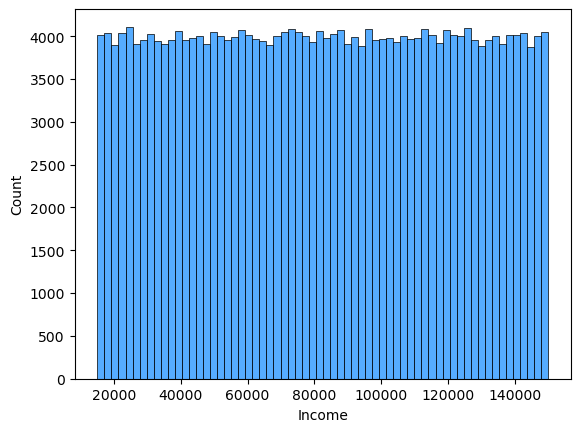

In [213]:
#This visualization helps you quickly understand the distribution of income
sns.histplot(data=loans, x='Income', color = "dodgerblue")
plt.show()

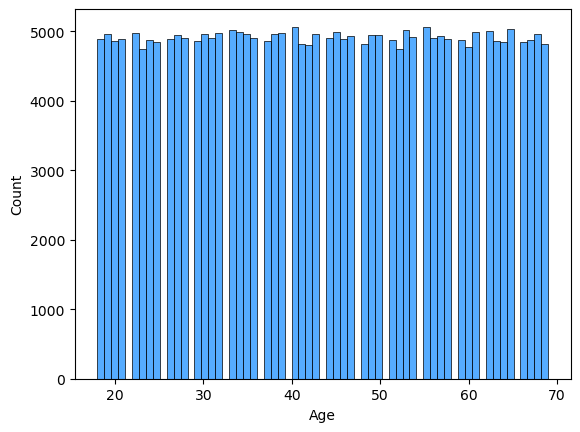

In [214]:
#This visualization helps you quickly understand the distribution of age
sns.histplot(data=loans, x='Age', color = "dodgerblue")
plt.show()

In [215]:
# None of the columns have null values
loans.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
MonthsEmployed    0
Education         0
EmploymentType    0
LoanPurpose       0
Default           0
dtype: int64

In [216]:
# Values look normal and without error

loans['MonthsEmployed'].unique()

array([ 80,  15,  26,   0,   8,  18,  67,  83, 114,  94,  56,  87, 112,
        31,  49, 106, 119,  65,  96,  55,  48,  73, 110,  58,  62,  16,
        57,  37,   6, 103,  39,  51,  24, 105,  47, 117,  32,  99,  84,
        72,  88,  27,  36,  33,  59,  20,  54,  76,  66,  11,  23,  22,
        93,  35,  50,  69,  70, 111,  63,   9,   1,  44,  25,  71, 101,
        53,  45,  91,  52,  74,  86,   4,  10,  82,   7,  79,  85,  12,
        17,  28,  68, 100,  60, 115,  43,  14,  13, 104,  95, 118, 113,
        97, 108,  40,  77, 109,  34,  41,  92,  46,   2,   3,  78, 116,
        89,  75,  81,   5,  90, 107,  98,  21,  64,  29,  30,  19,  38,
        61,  42, 102], dtype=int64)

In [217]:
# Values look normal and without error
loans['Default'].unique()

array([0, 1], dtype=int64)

In [218]:
# Values look normal and without error
loans['Education'].unique()

array(["Bachelor's", "Master's", 'High School', 'PhD'], dtype=object)

In [219]:
# Label encoded the 'Education' column
def transform_education(val):
    val = val.lower().strip()
    if val == 'high school':
        return 0
    if val == "bachelor's":
        return 1
    if val == "master's":
        return 2
    if val == 'phd':
        return 3
    return -1

loans['Education'] = loans['Education'].apply(transform_education)
loans['Education'] = loans['Education'].astype('Int64')
print(loans['Education'].head(5))

0    1
1    2
2    2
3    0
4    1
Name: Education, dtype: Int64


In [220]:
# Values look normal and without error
loans['EmploymentType'].unique()

array(['Full-time', 'Unemployed', 'Self-employed', 'Part-time'],
      dtype=object)

In [221]:
# Lable encoded 'EmploymentType' Column
def transform_edu_type(val):
    val = val.lower().strip()
    if val == 'unemployed':
        return 0
    if val == 'self-employed':
        return 1
    if val == 'part-time':
        return 2
    if val == 'full-time':
        return 3
    return -1
loans['EmploymentType'] = loans['EmploymentType'].apply(transform_edu_type)
loans['EmploymentType'] = loans['EmploymentType'].astype('Int64')
print(loans['EmploymentType'].head(5))


0    3
1    3
2    0
3    3
4    0
Name: EmploymentType, dtype: Int64


In [222]:
# Values look normal and without error
loans['LoanPurpose'].unique()

array(['Other', 'Auto', 'Business', 'Home', 'Education'], dtype=object)

In [223]:
# Label encoded the 'LoanPurpose' column
def transform_purpose(val):
    val = val.lower().strip()
    if val == 'auto':
        return 0
    if val == "business":
        return 1
    if val == "home":
        return 2
    if val == 'education':
        return 3
    if val == 'other':
        return 4
    return -1

loans['LoanPurpose'] = loans['LoanPurpose'].apply(transform_purpose)
loans['LoanPurpose'] = loans['LoanPurpose'].astype('Int64')
print(loans['LoanPurpose'].head(5))

0    4
1    4
2    0
3    1
4    0
Name: LoanPurpose, dtype: Int64


# Results

## Exploratory Data Analysis

### EDA - Data Exploration and T-Test Analysis
In this Section, we would like to discover the age distribution as well as correlation between each attribution pairs such as age vs income, age vs loan amount, age vs loan amount, education level vs loanAmount, and employeed month vs loanAmount.


In [224]:
#splitting the data into young adults and mid career adults
young_adults = loans[(loans['Age'] >= 18) & (loans['Age'] <= 28)]
mid_career_adults = loans[loans['Age'] > 28]

### Scatter plot: Age vs Income 

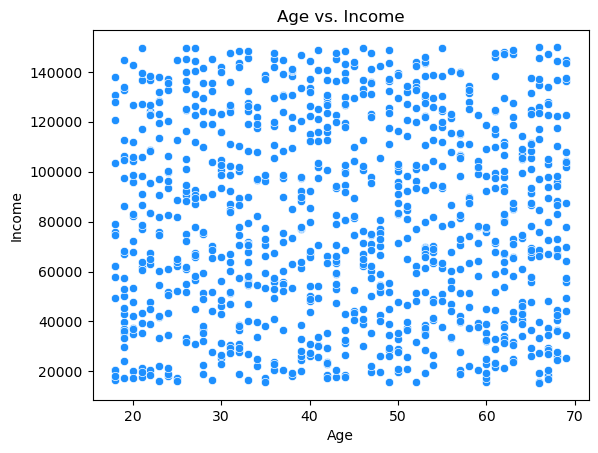

In [225]:
random_sampled_data = loans.sample(n = 1000)
ax = sns.scatterplot(data=random_sampled_data, x='Age', y='Income', color = "dodgerblue")
plt.title('Age vs. Income')
plt.show()

There is no trend in the scatter box shown above, therefore, we can conclude that there is no correlation between age and icome, which is different from what we expected.

### Scatter plot: Age vs Loan Amount of all ages

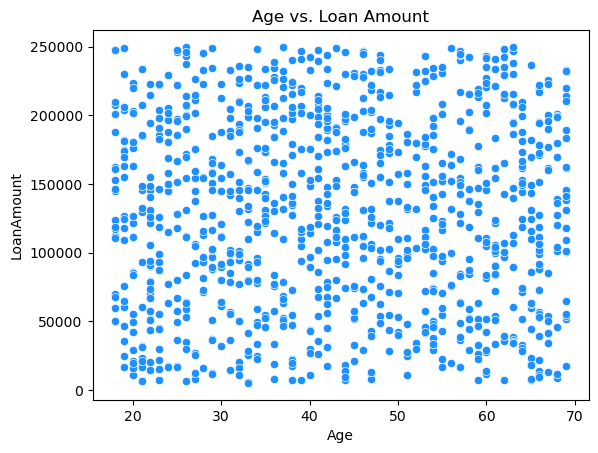

In [226]:
# Scatter plot of age vs. Loan Amount
random_sampled_data = loans.sample(n = 1000)
ax = sns.scatterplot(data=random_sampled_data, x='Age', y='LoanAmount', color="dodgerblue")
plt.title('Age vs. Loan Amount')
plt.show()

There is also no trend in the scatter box shown above, showing that there is no direct correlation between age and loan amount.

### Histogram: distribution of people from different ages

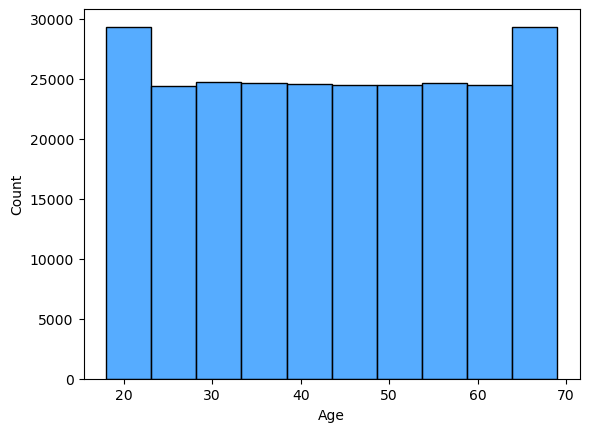

In [227]:
# histogram of age
sns.histplot(data = loans , x = 'Age', binwidth = 5, color="dodgerblue")
plt.show()

From the histogram above we can see that the distribution of people of ages 25 to 65 are about the same, but those that are 18-15 and 65-70 seems to have a higher distribution within this dataset. That being said, we would say that the number between each age groups are pretty even so there is no concerns in any age group being underrepresented.

### Scatter plot: Income vs Loan Amount of all ages

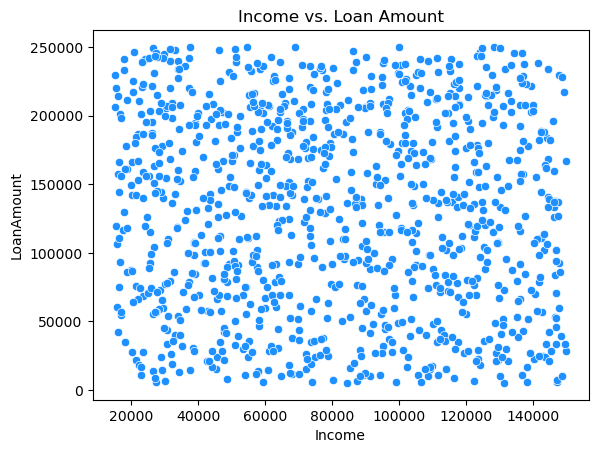

In [228]:
# Scatter plot of Income vs. Loan Amount
random_sampled_data = loans.sample(n = 1000)
ax = sns.scatterplot(data=random_sampled_data, x='Income', y='LoanAmount', color="dodgerblue")
plt.title('Income vs. Loan Amount')
plt.show()

After investigating the relationship between Age vs Loan amount and Age vs Income, we have decided to also do a scatter plot between Income and LoanAmount. Similar to the plots above, there is no trend observed from this plot, and therefore, there is no correlation between Income and LoanAmount which is also different from our expectations.

### Category Bar plot: Younger people -> Loan purpose vs Count (different age in different color)

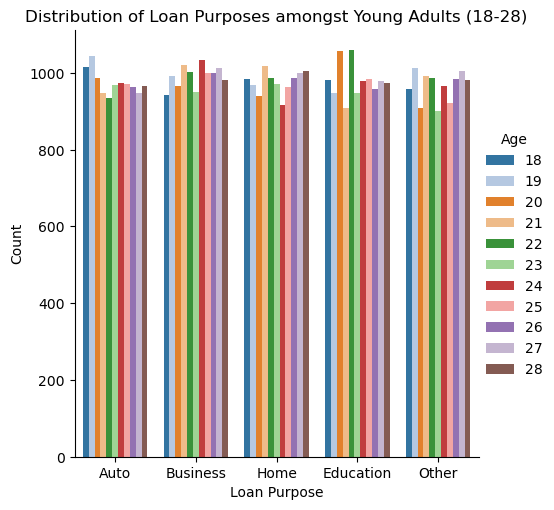

In [229]:
# Loan purpose against age groups
young_adults = loans[(loans['Age'] >= 18) & (loans['Age'] <= 28)]
mid_career_adults = loans[loans['Age'] > 28]

ax = sns.catplot(data=young_adults, x='LoanPurpose', hue='Age', kind = 'count', palette="tab20")

plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.title('Distribution of Loan Purposes amongst Young Adults (18-28)')
ax.set_xticklabels(["Auto", "Business", "Home", "Education", "Other"])


plt.show()


Auto loans were in slightly higher numbers for those that are 19 
- maybe they just got their liscences or they're going to college and needs a car 

business loans were in slightly higher numbers for those that are 24 
- also slighly higher for people that are older in this age group, they could be staring a business

home loans were in slightly higher numbers for those that are 21
- not sure why 21 years old. Difficult to grasp a reason behind this 

Eduation loans is in higher numbers for those that are 20 and 22 
- maybe they are college transfers or some one starting their Master's degree

other loans is in higher numbers for those that are 19 year old
- also unsure of the reasoning

### Category Bar plot: Older people -> Loan purpose vs Count (different age in different color)

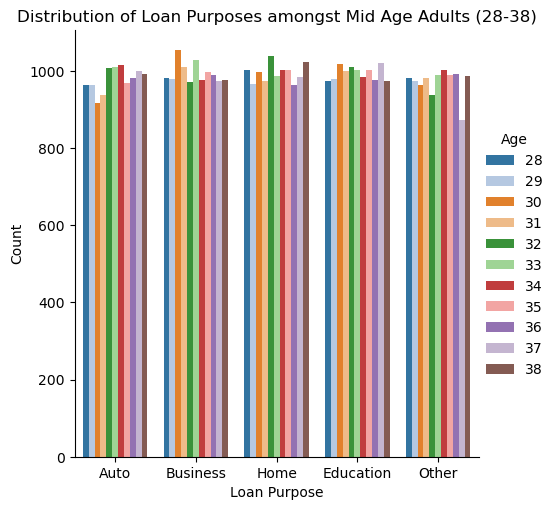

In [230]:
# Loan purpose against age groups
young_adults = loans[(loans['Age'] >= 18) & (loans['Age'] <= 28)]
mid_adults = loans[(loans['Age'] >= 28) & (loans['Age'] <= 38)]

ax = sns.catplot(data=mid_adults, x='LoanPurpose', hue='Age', kind = 'count', palette="tab20")

plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.title('Distribution of Loan Purposes amongst Mid Age Adults (28-38)')

ax.set_xticklabels(["Auto", "Business", "Home", "Education", "Other"])
plt.show()


Auto loans were in slightly higher numbers for those that are older within this age group 
- maybe they're getting a new car 

business loans were in slightly higher numbers for those that are 30 
- People that are 30 might have enough experience working, so they might want to start a business

home loans were in pretty average in numbers with 32 being the highest
-  After about 10 years of job, most people would like to plan to have their own house.

Eduation loans is very average in numbers 

other loans has a very low number for people that are 37 years old
- unsure of the reasoning

In comparison to the graph with younger people we can see that as people get older, there is less fluctuations in loans between each age. It could be due to at an older age, they've settled down and there is less big purchases or changes in their 30s.

### Box plot: Younger people -> Education level vs Loan Amount (people that returned vs didn't return loans in different colors)

C:\Users\saman\AppData\Local\Temp\ipykernel_30600\1700577200.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["High School", "Bachelor", "Masters", "PhD"])


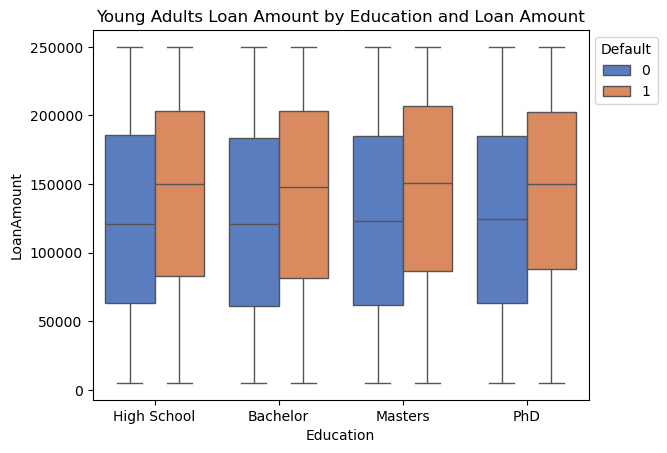

In [231]:
#Boxplot of loan amounts for defaulted and not defaulted loans, grouped by education level for young adults
ax = sns.boxplot(data=young_adults, x='Education', y='LoanAmount', hue='Default', palette="muted")
plt.title('Young Adults Loan Amount by Education and Loan Amount')

ax.set_xticklabels(["High School", "Bachelor", "Masters", "PhD"])

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

The boxplot presents a gap between the loan amount of people that pay off their loan compared to those who have not paid off their loan, pertaining to people of ages 18-28.

We can see that for those that pay back, they get an average of a higher loan Amount.

### Box plot: Older people -> Education level vs Loan Amount (people that returned vs didn't return loans in different colors)

C:\Users\saman\AppData\Local\Temp\ipykernel_30600\706610922.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["High School", "Bachelor", "Masters", "PhD"])


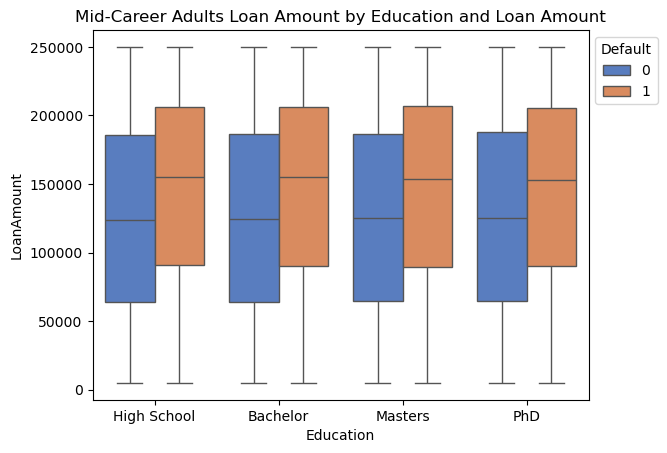

In [232]:
#Boxplot of loan amounts for approved and rejected loans, grouped by education level for mid career adults
ax = sns.boxplot(data=mid_career_adults, x='Education', y='LoanAmount', hue='Default', palette="muted")
plt.title('Mid-Career Adults Loan Amount by Education and Loan Amount')

ax.set_xticklabels(["High School", "Bachelor", "Masters", "PhD"])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

The boxplot presents a gap between the loan amount of people that pay off their loan compared to those who have not paid off their loan, pertaining to mid-career adults.

In this plot we can also see that for those that pay back, they get an average of a higher loan Amount.

### Box plot: Education level vs Loan Amount (old vs young people different colors)

C:\Users\saman\AppData\Local\Temp\ipykernel_30600\2806174542.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["High School", "Bachelor", "Masters", "PhD"])


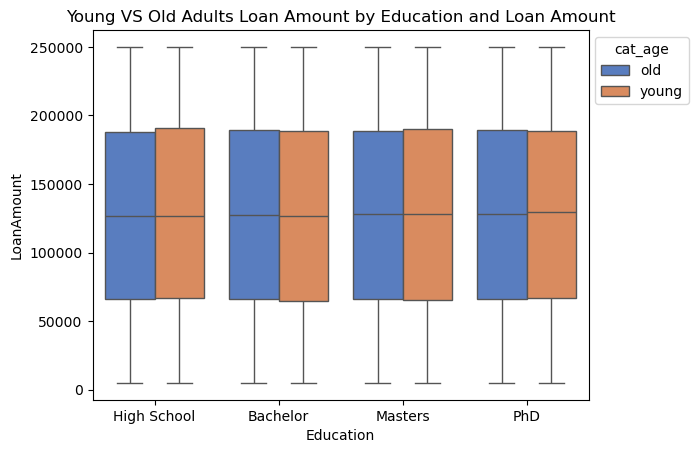

In [241]:
#Code visualizes how loan amounts vary across different education levels for two distinct age groups (young and old adults).
#creating a temporary dataframe to convert age columns into two categories (young vs old) for graphing purpose
categorized_age = loans.copy()
def cat_age(age):
    if (age >= 18) and (age <= 28):
        return "young"
    else:
        return "old"
categorized_age['cat_age'] = categorized_age['Age'].apply(cat_age)
categorized_age.head(5)

ax = sns.boxplot(data=categorized_age, x='Education', y='LoanAmount', hue='cat_age', palette="muted")
ax.set_xticklabels(["High School", "Bachelor", "Masters", "PhD"])
plt.title('Young VS Old Adults Loan Amount by Education and Loan Amount')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

The difference between young adults and older adults doesn't seems to be a huge gap, which was different from our expectations since we though older people would be able to get loans with higher loan amount

From this graph we can infer that education level doesn't make a big difference in loanAmount no matter if it is old or young people

### Scatter plot: Employment length vs Loan Amount

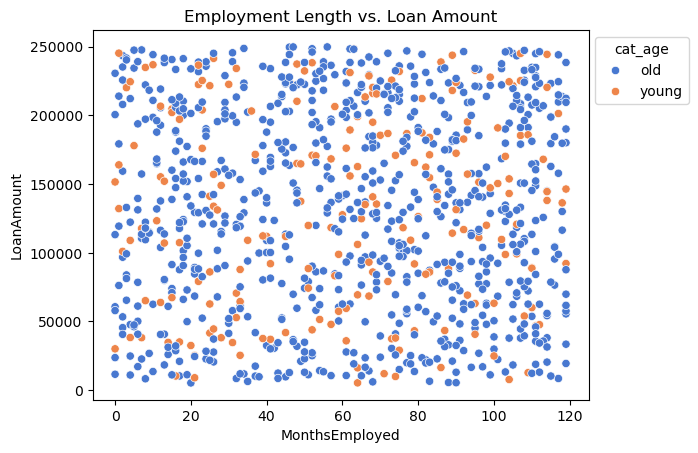

In [234]:
# plotting scatterplot to check corretaion between employment length and loan amount
random_sampled_data = categorized_age.sample(n = 1000)
ax = sns.scatterplot(data=random_sampled_data, x='MonthsEmployed', y='LoanAmount', hue='cat_age', palette="muted")
plt.title('Employment Length vs. Loan Amount')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

Since we don't see a trend within the scatter plot, we conclude that there is no correlation between Employment Length and Loan Amount, which is different from our expectations of people with longer employed months will be able to get more loan amounts.

### T-Test: different edu level of young people's return Loan rate

In [235]:
#calculating the loan return rates for two different groups: young adults (ages 18-28) and mid-career adults (over 28)
young_return_rate = 1 - young_adults['Default'].mean()
mid_career_return_rate = 1 - mid_career_adults['Default'].mean()

print(young_return_rate)
print(mid_career_return_rate)

0.7996949291268276
0.9063192932154036


From the above numbers we can see that there is a difference between younger and older people's rates in loan return! We will be investigating whether the difference is significance!

In [236]:
young_return_dist = young_adults['Default']
old_return_dist = mid_career_adults['Default']


t_val = ttest_ind(young_return_dist, old_return_dist)[0]
p_val = ttest_ind(young_return_dist, old_return_dist)[1]
print(f"T-statistic: {t_val}")
print(f"P-value: {p_val}")

alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: There is a significant difference in repaid loan amount between young people (18-28 years old) and older people (people older than 28 years old).")
else:
    print("Fail to reject the null hypothesis: No significant difference in repaid loan amount between young people (18-28 years old) and older people (people older than 28 years old).")

T-statistic: 69.20150311384359
P-value: 0.0
Reject the null hypothesis: There is a significant difference in repaid loan amount between young people (18-28 years old) and older people (people older than 28 years old).


Since our p-value is less than 0.05, there proves significance between the number of repaid loan of ages 18-28 and ages 28-38.

### T-Test: different age people's Loan Amount

In [237]:
# Average Loan Amount
young_loanamount_rate = young_adults['LoanAmount'].mean()
mid_career_loanamount_rate = mid_career_adults['LoanAmount'].mean()

print(young_loanamount_rate)
print(mid_career_loanamount_rate)

127860.5326463038
127503.75297263243


Different from our expectation but matched with our age vs loan amount scatter plot above, there is not big of a difference between loan amount in different age groups.

However, we will still do a T-Test to see if there the difference is significant.

In [238]:
# Performing t-test on loan amount for young adults compared to mid career adults
young_loanAmount_dist = young_adults['LoanAmount']

#loan amount for Mid career adults
old_loanAmount_dist = mid_career_adults['LoanAmount']

# t-val and p-val
t_val = ttest_ind(young_loanAmount_dist, old_loanAmount_dist)[0]
p_val = ttest_ind(young_loanAmount_dist, old_loanAmount_dist)[1]
print(f"T-statistic: {t_val}")
print(f"P-value: {p_val}")

alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: There is a significant difference in loan amount between young people (18-28 years old) and older people (people older than 28 years old).")
else:
    print("Fail to reject the null hypothesis: No significant difference in loan amount between young people (18-28 years old) and older people (people older than 28 years old).")

T-statistic: 1.037544838428617
P-value: 0.2994829928652984
Fail to reject the null hypothesis: No significant difference in loan amount between young people (18-28 years old) and older people (people older than 28 years old).


Since our p-value is greater than 0.05, there proves no significance between the loan amount of ages 18-28 and ages 28-38.

### T-Test: different edu level of young people's Loan Amount

In [239]:
# edu Loan Amount avg
edu01_loanamount_rate = young_adults[(young_adults['Education'] == 0) | (young_adults['Education'] == 1) ]['LoanAmount'].mean()
edu23_loanamount_rate = young_adults[(young_adults['Education'] == 2) | (young_adults['Education'] == 3) ]['LoanAmount'].mean()

print(edu01_loanamount_rate)
print(edu23_loanamount_rate)

127625.50025916328
128097.86720502467


Different from our expectation but matched with our different edu level people vs Loan amount box plot above, there is not big of a difference between loan amount in different edu levels.

However, we will still do a T-Test to see if there the difference is significant.

In [240]:
# Performing t-test on loan amount for young adults comparing the education levels of high school and bachelor compare to masters and phd
young_bach_hs_loanAmount_dist = young_adults[(young_adults['Education'] == 0) | (young_adults['Education'] == 1) ]['LoanAmount']

#loan amount for Mid career adults
young_masters_phd_loanAmount_dist = young_adults[(young_adults['Education'] == 2) | (young_adults['Education'] == 3) ]['LoanAmount']


# t-val and p-val
t_val = ttest_ind(young_bach_hs_loanAmount_dist, young_bach_hs_loanAmount_dist)[0]
p_val = ttest_ind(young_bach_hs_loanAmount_dist, young_masters_phd_loanAmount_dist)[1]
print(f"T-statistic: {t_val}")
print(f"P-value: {p_val}")

alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: There is a significant difference in loan amount between young people with a high school/bachelor's degree and young people with a masters/phd.")
else:
    print("Fail to reject the null hypothesis: No significant difference in loan amount between young people with high school/bachelor's degree and young people with a masters/phd.")



T-statistic: 0.0
P-value: 0.4408378716657291
Fail to reject the null hypothesis: No significant difference in loan amount between young people with high school/bachelor's degree and young people with a masters/phd.


Since our p-value is greater than 0.05, there is no significantly significant difference in loan amount between young people with high school/bachelor's degree and young people with a masters/phd.

# Ethics & Privacy

We need to consider the privacy of individuals in our dataset because we have access to sensitive information such as their age, employment status, gender, credit history, income, and marital status. Additional columns that we have access to provide details including months employed, number of credit lines, education level, and employment type. These variables are crucial for a data analysis but they may raise privacy concerns as they contain personal information. The LoanID column anonmyizes the individuals identity to ensure privacy. This allows us to make meaningful analysis without threatening the individuals privacy. Our data lacks geographical data which means it does not account for the socioeconomic differences across regions. The absence of this could unequally represent people from different socioeconomic backgrounds. This is a limitation that we will keep in mind in our analysis. The results of our analysis could impact students by providing insights into the factors that affect loan approval and qualification. For instance, it may be revealed that younger borrowers with less work experience or lower incomes are at a higher risk of loan rejection, which could guide them on improving their profiles. In addition, financial institutions may use our findings to refine their loan approval criteria. By identifying which factors (income, credit history, months employed) are strong predictors of loan default, they can better assess risk and make more informed lending decisions. As we are unsure of the exact data collection methods, there may be biases that influence who is included in the dataset. For example, individuals with poor credit history or unconventional employment types might be underrepresented. We will acknowledge the potential for selection bias in our analysis and discuss its possible effects on the results. This allows stakeholders to interpret the findings with caution, understanding that the dataset might not fully reflect the diversity of loan applicants and where possible, we will segment the data by relevant categories (e.g., age groups, income levels, education levels) to assess if certain groups are disproportionately affected by the bias.

# Team Expectations 

* We will be using Discord for our communication
* We should meet once a week to work on our project virtually
* Our tone should be calm and polite when dicussing things
* Our decision making of the project will be a majority vote
* Everyone will do a little bit of every part of the project
* Tasks will be assigned to people through communication on Discord and working on the project once a week virtually
* We will be using the project timeline proposal as the plan for deadlines
* If a person is struggling, they should ask the group as soon as possible and everyone should try to help
* The person should contact the group through Discord

# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 10/13  |  7 PM | Read & Think about COGS 108 expectations; brainstorm topics/questions  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 10/21  |  7 PM |  Do background research on topic | Discuss ideal dataset(s) and ethics; draft project proposal | 
| 10/29  | 7 PM  | Edit, finalize, and submit proposal; Search for datasets  | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 11/7  | 7 PM  | Import & Wrangle Data; EDA | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 11/21  | 7 PM  | Finalize wrangling/EDA; Begin Analysis | Discuss/edit Analysis; Complete project check-in |
| 12/5  | 7 PM  | Complete analysis; Draft results/conclusion/discussion | Discuss/edit full project |
| 12/10  | Before 11:59 PM  | Check over all steps in project | Turn in Final Project & Group Project Surveys |